In [118]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
df=pd.read_csv("income.csv")
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


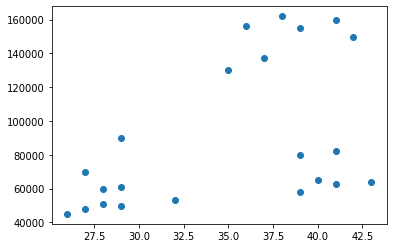

In [120]:
plt.scatter(df['Age'],df['Income($)'])

In [122]:
km=KMeans(n_clusters=3)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [131]:
y_predicted=km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2])

In [124]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


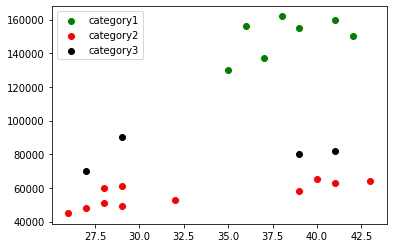

In [125]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='category1')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='category2')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='category3')

plt.legend()

In [126]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [127]:
scaler.fit(df[['Income($)']])
df['Income($)']=scaler.transform(df[['Income($)']])
df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,2
1,Michael,29,0.384615,2
2,Mohan,29,0.136752,1
3,Ismail,28,0.128205,1
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [128]:
scaler.fit(df[['Age']])
df['Age']=scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [129]:
km.cluster_centers_

array([[3.82857143e+01, 1.50000000e+05],
       [3.29090909e+01, 5.61363636e+04],
       [3.40000000e+01, 8.05000000e+04]])

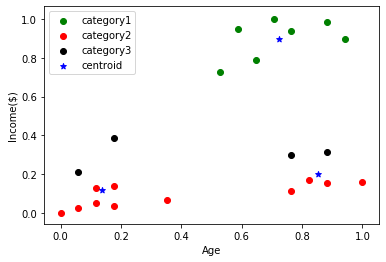

In [132]:
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

plt.scatter(df1.Age,df1['Income($)'],color='green',label='category1')
plt.scatter(df2.Age,df2['Income($)'],color='red',label='category2')
plt.scatter(df3.Age,df3['Income($)'],color='black',label='category3')

plt.scatter(km.cluster_centers_[:, 0],km.cluster_centers_[:, 1],color='blue',marker='*',label='centroid')

plt.xlabel('Age')
plt.ylabel('Income($)')
plt.legend()

In [133]:
k_rng=range(1,10)
sse=[]
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)

In [134]:
sse

[5.43401151198818,
 2.091136388699078,
 0.4750783498553096,
 0.3491047094419565,
 0.2621792762345213,
 0.22395807059250128,
 0.16858512236029757,
 0.14072448985352307,
 0.10383752586603559]

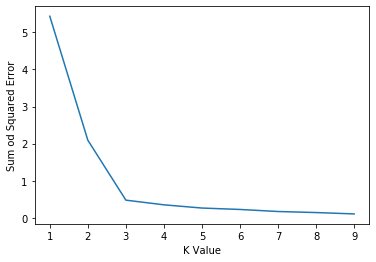

In [135]:
plt.xlabel('K Value')
plt.ylabel('Sum od Squared Error')
plt.plot(k_rng,sse)